In [2]:
!pip -q install ultralytics==8.* kaggle
import ultralytics
ultralytics.checks()


Ultralytics 8.3.252 🚀 Python-3.12.12 torch-2.9.0+cpu CPU (Intel Xeon CPU @ 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 21.2/107.7 GB disk)


In [4]:
import os, zipfile, shutil, glob, textwrap, json, pathlib

os.makedirs("/root/.kaggle", exist_ok=True)

if os.path.exists("/content/kaggle.json"):
    shutil.copy("/content/kaggle.json", "/root/.kaggle/kaggle.json")
    os.chmod("/root/.kaggle/kaggle.json", 0o600)

assert os.path.exists("/root/.kaggle/kaggle.json"), "need kaggle.json"
print("kaggle.json найден")


kaggle.json найден


In [5]:
DATASET_SLUG = "yusufmurtaza01/plantdoc-object-detection-dataset"
OUT_DIR = "/content/plantdoc"

!kaggle datasets download -d {DATASET_SLUG} -p /content --unzip

candidates = [
    "/content/plantdoc-object-detection-dataset",
    "/content/plantdoc-object-detection-dataset/plantdoc-object-detection-dataset",
    "/content"
]

def find_dataset_root(base="/content"):
    for p in glob.glob(base + "/**", recursive=True):
        if os.path.isdir(p) and os.path.isdir(os.path.join(p, "images")) and os.path.isdir(os.path.join(p, "labels")):
            if os.path.isdir(os.path.join(p, "images", "train")) and os.path.isdir(os.path.join(p, "images", "val")):
                return p
    return None

root = find_dataset_root("/content")
assert root is not None, "Не нашел структуру images/train, images/val, labels/train, labels/val."

if os.path.abspath(root) != os.path.abspath(OUT_DIR):
    if os.path.exists(OUT_DIR):
        shutil.rmtree(OUT_DIR)
    shutil.copytree(root, OUT_DIR)

print("Dataset root:", OUT_DIR)
print("Train images:", len(glob.glob(OUT_DIR + "/images/train/*")))
print("Val images:", len(glob.glob(OUT_DIR + "/images/val/*")))
print("Train labels:", len(glob.glob(OUT_DIR + "/labels/train/*")))
print("Val labels:", len(glob.glob(OUT_DIR + "/labels/val/*")))


Dataset URL: https://www.kaggle.com/datasets/yusufmurtaza01/plantdoc-object-detection-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
 98% 912M/934M [00:09<00:00, 256MB/s]
100% 934M/934M [00:09<00:00, 104MB/s]
Dataset root: /content/plantdoc
Train images: 2335
Val images: 236
Train labels: 2335
Val labels: 236


In [6]:
DATA_YAML_PATH = "/content/plantdoc_data.yaml"

yaml_text = r"""
path: /content/plantdoc
train: images/train
val: images/val

nc: 29
names:
  0: Cherry leaf
  1: Peach leaf
  2: Corn leaf blight
  3: Apple rust leaf
  4: Potato leaf late blight
  5: Strawberry leaf
  6: Corn rust leaf
  7: Tomato leaf late blight
  8: Tomato mold leaf
  9: Potato leaf early blight
  10: Apple leaf
  11: Tomato leaf yellow virus
  12: Blueberry leaf
  13: Tomato leaf mosaic virus
  14: Raspberry leaf
  15: Tomato leaf bacterial spot
  16: Squash Powdery mildew leaf
  17: grape leaf
  18: Corn Gray leaf spot
  19: Tomato Early blight leaf
  20: Apple Scab Leaf
  21: Tomato Septoria leaf spot
  22: Tomato leaf
  23: Soyabean leaf
  24: Bell_pepper leaf spot
  25: Bell_pepper leaf
  26: grape leaf black rot
  27: Potato leaf
  28: Tomato two spotted spider mites leaf
""".strip()

with open(DATA_YAML_PATH, "w", encoding="utf-8") as f:
    f.write(yaml_text)

print("Wrote:", DATA_YAML_PATH)
print(yaml_text[:400] + "\n...")


Wrote: /content/plantdoc_data.yaml
path: /content/plantdoc
train: images/train
val: images/val

nc: 29
names:
  0: Cherry leaf
  1: Peach leaf
  2: Corn leaf blight
  3: Apple rust leaf
  4: Potato leaf late blight
  5: Strawberry leaf
  6: Corn rust leaf
  7: Tomato leaf late blight
  8: Tomato mold leaf
  9: Potato leaf early blight
  10: Apple leaf
  11: Tomato leaf yellow virus
  12: Blueberry leaf
  13: Tomato leaf mosaic viru
...


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
from ultralytics import YOLO

MODEL_WEIGHTS = "yolov8n.pt"
EPOCHS = 150
IMGSZ = 640
BATCH = 16
LR0 = 0.01
WEIGHT_DECAY = 5e-4
COS_LR = True

In [ ]:
model = YOLO(MODEL_WEIGHTS)

results = model.train(
    data=DATA_YAML_PATH,
    epochs=EPOCHS,
    imgsz=IMGSZ,
    batch=BATCH,
    lr0=LR0,
    weight_decay=WEIGHT_DECAY,
    cos_lr=COS_LR,
    project="/content/drive/MyDrive/yolo_runs",
    name="plantdoc_yolov8n",
    patience=30,        # early stopping
    workers=2
)

print("Training done")


Ultralytics 8.3.252 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=True, cutmix=0.0, data=/content/plantdoc_data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=150, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=plantdoc_yolov8n, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=30, perspective=0.0, plots=Tru

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import os, glob

run_dir = "/content/drive/MyDrive/yolo_runs/plantdoc_yolov8n"
csv_path = os.path.join(run_dir, "results.csv")
assert os.path.exists(csv_path), f"Не найден {csv_path}. Проверь имя run_dir."

df = pd.read_csv(csv_path)
print(df.columns.tolist())
df.head()


['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss', 'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss', 'lr/pg0', 'lr/pg1', 'lr/pg2']


,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,70.514,1.29110,4.18214,1.44990,0.45382,0.13363,0.10789,0.08209,0.93797,3.20864,1.31866,0.000100,0.000100,0.000100
1,2,134.198,1.28138,3.44046,1.41586,0.22501,0.35713,0.23883,0.18105,1.05129,2.64706,1.43337,0.000201,0.000201,0.000201
2,3,200.911,1.30470,3.01937,1.43116,0.27279,0.40157,0.30165,0.22707,1.03178,2.36713,1.41058,0.000302,0.000302,0.000302
3,4,265.768,1.29892,2.74342,1.42016,0.22679,0.47714,0.33483,0.25158,0.99678,2.21395,1.35515,0.000303,0.000303,0.000303
4,5,331.587,1.27162,2.58007,1.39076,0.26240,0.50895,0.38481,0.28628,1.01088,2.10497,1.37114,0.000302,0.000302,0.000302


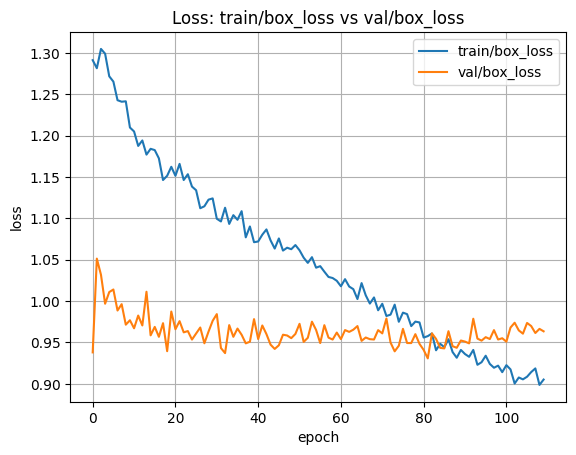

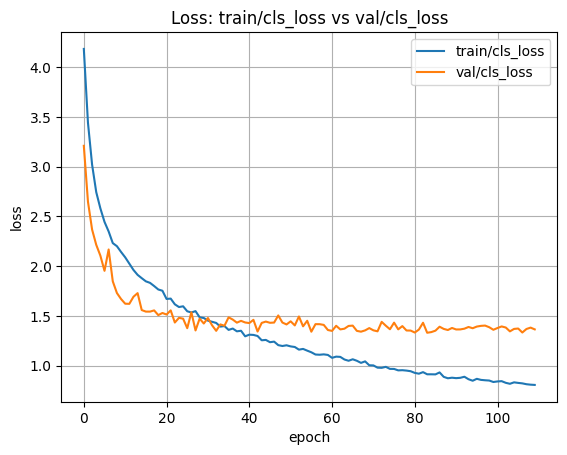

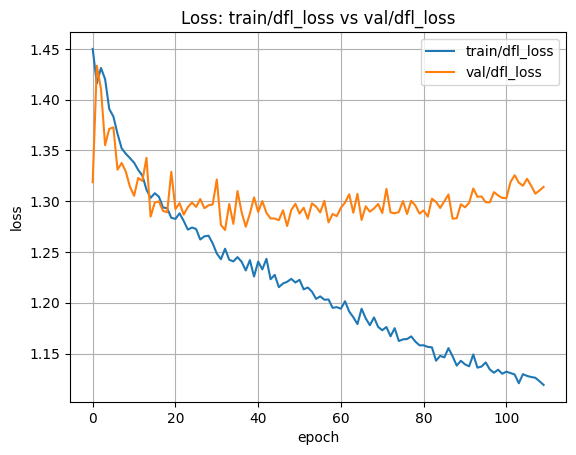

In [20]:
loss_cols = [
    ("train/box_loss", "val/box_loss"),
    ("train/cls_loss", "val/cls_loss"),
    ("train/dfl_loss", "val/dfl_loss"),
]

for tr, va in loss_cols:
    if tr in df.columns and va in df.columns:
        plt.figure()
        plt.plot(df[tr], label=tr)
        plt.plot(df[va], label=va)
        plt.title(f"Loss: {tr} vs {va}")
        plt.xlabel("epoch")
        plt.ylabel("loss")
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        print("Не нашел колонки:", tr, va)


In [14]:
best_weights = os.path.join(run_dir, "weights", "best.pt")
assert os.path.exists(best_weights), "best.pt не найден — проверь run_dir."

best_model = YOLO(best_weights)

val_metrics = best_model.val(data=DATA_YAML_PATH, imgsz=IMGSZ, batch=BATCH)
print(val_metrics)


Ultralytics 8.3.252 🚀 Python-3.12.12 torch-2.9.0+cpu CPU (Intel Xeon CPU @ 2.20GHz)
Model summary (fused): 72 layers, 3,011,303 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1226.6±570.3 MB/s, size: 100.2 KB)
val: Scanning /content/plantdoc/labels/val... 236 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 236/236 318.7it/s 0.7s
val: /content/plantdoc/images/val/val_00139.jpg: corrupt JPEG restored and saved
val: New cache created: /content/plantdoc/labels/val.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 15/15 3.5s/it 52.7s
                   all        236        452      0.533      0.678      0.631      0.496
           Cherry leaf         10         19       0.79      0.474      0.628      0.507
            Peach leaf          9         10      0.775        0.8      0.809      0.647
      Corn leaf blight         12         12      0.509      0.432      0.607      0.492
  

In [25]:
import random
from PIL import Image
import matplotlib.pyplot as plt

val_imgs = glob.glob(OUT_DIR + "/images/val/*")
assert len(val_imgs) > 0, "Нет val изображений."

sample_imgs = random.sample(val_imgs, k=min(8, len(val_imgs)))

preds = best_model.predict(
    source=sample_imgs,
    imgsz=IMGSZ,
    conf=0.25,
    iou=0.7,
    save=True,
    project="runs/predict",
    name="plantdoc_test"
)

print("Saved predictions to:", "runs/predict/plantdoc_test")



0: 640x640 1 Potato leaf early blight, 214.0ms
1: 640x640 1 grape leaf, 214.0ms
2: 640x640 2 Peach leafs, 214.0ms
3: 640x640 1 Apple rust leaf, 1 grape leaf black rot, 214.0ms
4: 640x640 4 Raspberry leafs, 214.0ms
5: 640x640 1 Soyabean leaf, 214.0ms
6: 640x640 1 grape leaf, 214.0ms
7: 640x640 1 Squash Powdery mildew leaf, 11 Tomato leafs, 214.0ms
Speed: 7.9ms preprocess, 214.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/runs/predict/plantdoc_test3
Saved predictions to: runs/predict/plantdoc_test


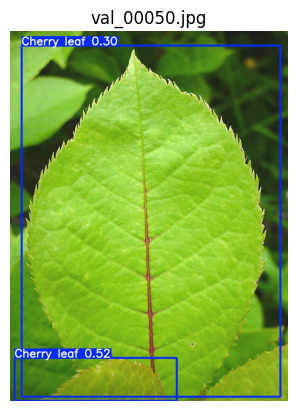

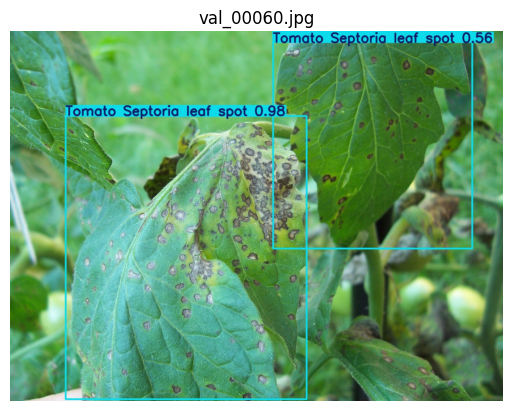

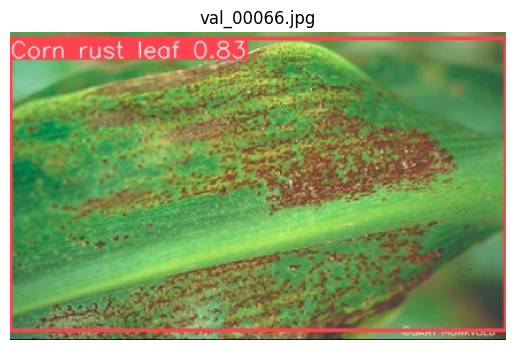

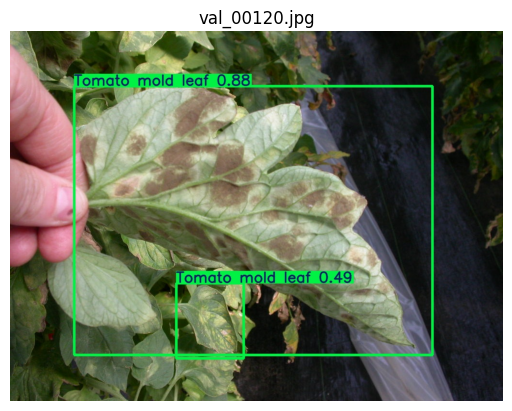

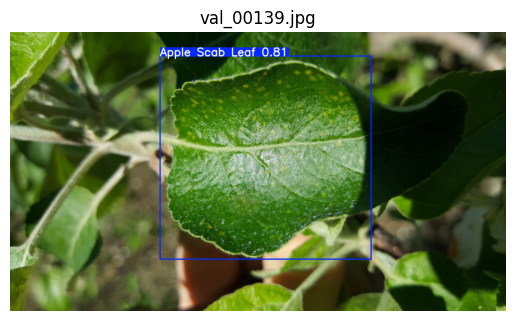

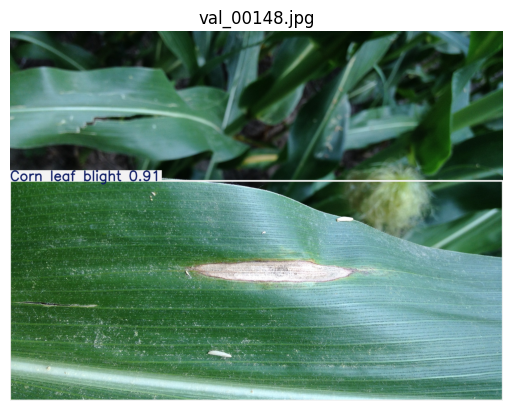

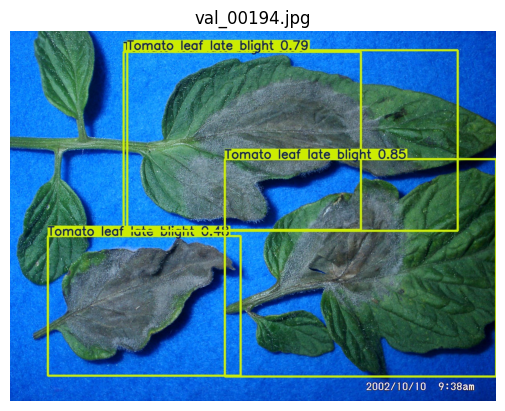

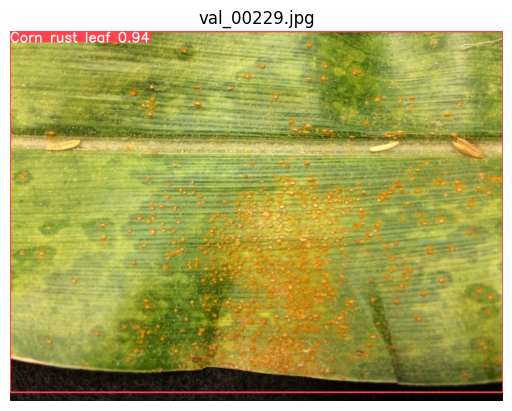

In [26]:
pred_dir = "runs/detect/runs/predict/plantdoc_test"
pred_images = sorted(glob.glob(pred_dir + "/*.jpg") + glob.glob(pred_dir + "/*.png"))

for p in pred_images[:8]:
    img = Image.open(p)
    plt.figure()
    plt.imshow(img)
    plt.axis("off")
    plt.title(os.path.basename(p))
    plt.show()
